##Academic Integrity Statement

"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

# PART III - Building a CNN

In [85]:
import numpy as np
import tensorflow as tf
import pandas as pd 
from matplotlib import pyplot as plt

import keras
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout


Importing the dataset

In [86]:
from keras.datasets import fashion_mnist
fash = fashion_mnist
(fash_x_train, fash_y_train), (fash_x_test, fash_y_test) = fash.load_data()

In [87]:
print(fash_x_train.shape, fash_y_train.shape)
print(fash_x_test.shape, fash_y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Data Visualizations 

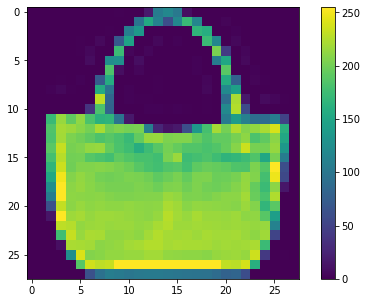

In [88]:
plt.figure(figsize = [8,5])
plt.imshow(fash_x_train[100])
plt.colorbar()
plt.grid(False)
plt.show()

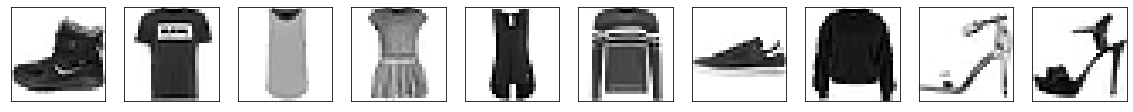

In [ ]:
f = plt.figure(figsize=[20, 20])
for i in range(10):
  visual = f.add_subplot(1, 10, i+1, xticks=[], yticks=[])
  visual.imshow(fash_x_train[i],cmap=plt.cm.binary)

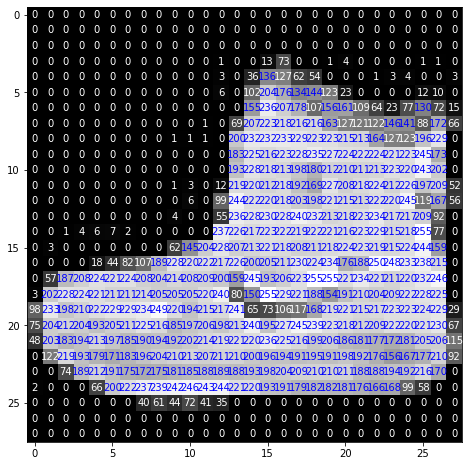

In [ ]:
def v3(a, visual):
    visual.imshow(a, cmap='gray')
    w, h = a.shape
    t= a.max()/2
    for x in range(w):
        for y in range(h):
            visual.annotate(str(round(a[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if a[x][y]<t else 'blue')

figure = plt.figure(figsize = (8,8)) 
axis = figure.add_subplot(111)
v3(fash_x_train[0], axis)

Reshaping the dataset 

In [89]:
n_col = 28
n_row = 28
fash_x_train = fash_x_train.reshape((fash_x_train.shape[0], n_row, n_col, 1)) 
fash_x_test = fash_x_test.reshape((fash_x_test.shape[0], n_row, n_col, 1))

Performing one hot encoding on the target variables 


In [28]:
# fash_y_train = tf.keras.utils.to_categorical(fash_y_train)
# fash_y_test = tf.keras.utils.to_categorical(fash_y_test)

Normalizing the dataset

In [90]:
# tr = fash_x_train.astype('float32') 
# te = fash_x_test.astype('float32') 
fash_x_train = fash_x_train/255
fash_x_test = fash_x_test/255


In [91]:
print(fash_x_train.shape)
print(fash_x_test.shape)
print(fash_y_train.shape)
print(fash_y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


Building CNN model

In [55]:
fash_model = keras.models.Sequential([keras.layers.Conv2D(filters=40, kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=126, activation='relu'),
                                 keras.layers.Dense(units=10, activation='softmax')])

In [ ]:
fash_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 40)        400       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 7840)              0         
                                                                 
 dense_4 (Dense)             (None, 126)               987966    
                                                                 
 dense_5 (Dense)             (None, 10)                1270      
                                                                 
Total params: 989,636
Trainable params: 989,636
Non-trainable params: 0
________________________________________________

In [56]:
fash_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
fash_evaluation = fash_model.fit(fash_x_train, fash_y_train, batch_size = 65, epochs=10,validation_data=(fash_x_test, fash_y_test))

Epoch 1/10
924/924 [==============================] - 8s 8ms/step - loss: 0.4022 - accuracy: 0.8579 - val_loss: 0.3259 - val_accuracy: 0.8818
Epoch 2/10
924/924 [==============================] - 7s 7ms/step - loss: 0.2714 - accuracy: 0.9019 - val_loss: 0.2993 - val_accuracy: 0.8885
Epoch 3/10
924/924 [==============================] - 7s 7ms/step - loss: 0.2310 - accuracy: 0.9161 - val_loss: 0.2766 - val_accuracy: 0.8982
Epoch 4/10
924/924 [==============================] - 7s 7ms/step - loss: 0.1985 - accuracy: 0.9272 - val_loss: 0.2680 - val_accuracy: 0.9065
Epoch 5/10
924/924 [==============================] - 7s 7ms/step - loss: 0.1765 - accuracy: 0.9351 - val_loss: 0.2646 - val_accuracy: 0.9032
Epoch 6/10
924/924 [==============================] - 7s 7ms/step - loss: 0.1523 - accuracy: 0.9434 - val_loss: 0.2528 - val_accuracy: 0.9121
Epoch 7/10
924/924 [==============================] - 7s 7ms/step - loss: 0.1343 - accuracy: 0.9505 - val_loss: 0.2636 - val_accuracy: 0.9123
Epoch 

In [ ]:
fash_model.evaluate(fash_x_test, fash_y_test)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.2820 - accuracy: 0.9164


0.9164000153541565

In [ ]:
acc= 100*fash_model.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 91.64000153541565 %


Plotting train and test accuracy 

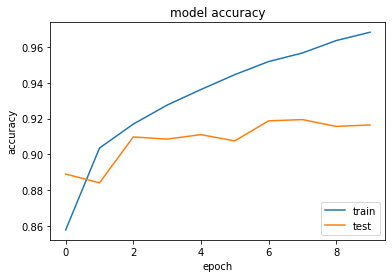

In [ ]:
plt.plot(fash_evaluation.history['accuracy'])
plt.plot(fash_evaluation.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Plotting train and test loss

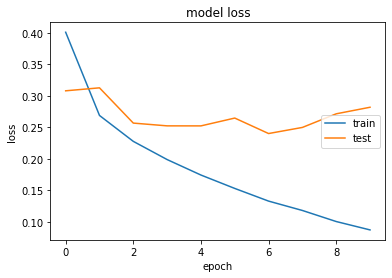

In [ ]:
plt.plot(fash_evaluation.history['loss'])
plt.plot(fash_evaluation.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0,patience = 200)

In [ ]:
fash_model1 = keras.models.Sequential([keras.layers.Conv2D(filters=40, kernel_size=5,strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Flatten(),
                                 keras.layers.Dropout(0.2)
                                 keras.layers.Dense(units=84, activation='relu'),
                                 keras.layers.Dense(units=10, activation='softmax')])


In [ ]:
fash_model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
fash_evaluation1= fash_model1.fit(fash_x_train, fash_y_train,batch_size = 65, epochs= 7, validation_data=(fash_x_test, fash_y_test), callbacks = [es])

Epoch 1/7
924/924 [==============================] - 20s 10ms/step - loss: 0.3820 - accuracy: 0.8648 - val_loss: 0.3308 - val_accuracy: 0.8790
Epoch 2/7
924/924 [==============================] - 8s 9ms/step - loss: 0.2611 - accuracy: 0.9047 - val_loss: 0.2771 - val_accuracy: 0.9004
Epoch 3/7
924/924 [==============================] - 8s 9ms/step - loss: 0.2125 - accuracy: 0.9220 - val_loss: 0.2677 - val_accuracy: 0.9035
Epoch 4/7
924/924 [==============================] - 8s 9ms/step - loss: 0.1795 - accuracy: 0.9338 - val_loss: 0.2469 - val_accuracy: 0.9148
Epoch 5/7
924/924 [==============================] - 8s 9ms/step - loss: 0.1531 - accuracy: 0.9426 - val_loss: 0.2566 - val_accuracy: 0.9134
Epoch 6/7
924/924 [==============================] - 9s 10ms/step - loss: 0.1297 - accuracy: 0.9520 - val_loss: 0.2676 - val_accuracy: 0.9131
Epoch 7/7
924/924 [==============================] - 8s 9ms/step - loss: 0.1103 - accuracy: 0.9592 - val_loss: 0.2647 - val_accuracy: 0.9185


In [ ]:
acc= 100*fash_model1.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 91.8500006198883 %


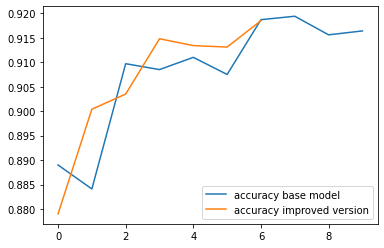

In [ ]:
from matplotlib import pyplot
pyplot.plot(fash_evaluation.history['val_accuracy'], label='accuracy base model')
pyplot.plot(fash_evaluation1.history['val_accuracy'], label='accuracy improved version')
pyplot.legend()
pyplot.show()

Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization
fash_model2 = keras.models.Sequential([keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(28,28,1)),
                                 keras.layers.MaxPool2D(pool_size=2),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Flatten(),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(units=256, activation='relu'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(units=10, activation='softmax')])

In [ ]:
fash_model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
fash_evaluation2= fash_model2.fit(fash_x_train, fash_y_train,batch_size = 65, epochs= 10, validation_data=(fash_x_test, fash_y_test))

Epoch 1/10
862/862 [==============================] - 9s 10ms/step - loss: 0.4053 - accuracy: 0.8575 - val_loss: 0.2863 - val_accuracy: 0.8955
Epoch 2/10
862/862 [==============================] - 8s 10ms/step - loss: 0.2771 - accuracy: 0.8981 - val_loss: 0.2607 - val_accuracy: 0.9034
Epoch 3/10
862/862 [==============================] - 8s 9ms/step - loss: 0.2416 - accuracy: 0.9106 - val_loss: 0.2707 - val_accuracy: 0.9039
Epoch 4/10
862/862 [==============================] - 8s 10ms/step - loss: 0.2183 - accuracy: 0.9185 - val_loss: 0.2476 - val_accuracy: 0.9121
Epoch 5/10
862/862 [==============================] - 8s 9ms/step - loss: 0.1974 - accuracy: 0.9264 - val_loss: 0.2662 - val_accuracy: 0.9096
Epoch 6/10
862/862 [==============================] - 8s 10ms/step - loss: 0.1854 - accuracy: 0.9318 - val_loss: 0.2701 - val_accuracy: 0.9130
Epoch 7/10
862/862 [==============================] - 8s 9ms/step - loss: 0.1691 - accuracy: 0.9362 - val_loss: 0.2641 - val_accuracy: 0.9154
Ep

In [ ]:
acc= 100*fash_model2.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 91.87142848968506 %


In the above we got accuracy of 91.87%

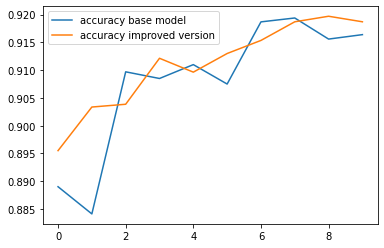

In [ ]:
pyplot.plot(fash_evaluation.history['val_accuracy'], label='accuracy base model')
pyplot.plot(fash_evaluation2.history['val_accuracy'], label='accuracy improved version')
pyplot.legend()
pyplot.show()

L2 Regularization

In [50]:
from keras import regularizers
fash_model3 = keras.models.Sequential([keras.layers.Conv2D(filters=40, kernel_regularizer = regularizers.l2(0.00001),kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=126, activation='relu'),
                                 keras.layers.Dense(units=10, activation='softmax')])
fash_model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
fash_evaluation3= fash_model3.fit(fash_x_train, fash_y_train,batch_size = 65, epochs= 10, validation_data=(fash_x_test, fash_y_test))

Epoch 1/10
924/924 [==============================] - 11s 11ms/step - loss: 0.3738 - accuracy: 0.8665 - val_loss: 0.3090 - val_accuracy: 0.8889
Epoch 2/10
924/924 [==============================] - 9s 10ms/step - loss: 0.2509 - accuracy: 0.9086 - val_loss: 0.2685 - val_accuracy: 0.9020
Epoch 3/10
924/924 [==============================] - 9s 10ms/step - loss: 0.2078 - accuracy: 0.9236 - val_loss: 0.2568 - val_accuracy: 0.9052
Epoch 4/10
924/924 [==============================] - 9s 10ms/step - loss: 0.1749 - accuracy: 0.9355 - val_loss: 0.2563 - val_accuracy: 0.9081
Epoch 5/10
924/924 [==============================] - 10s 11ms/step - loss: 0.1509 - accuracy: 0.9434 - val_loss: 0.2520 - val_accuracy: 0.9142
Epoch 6/10
924/924 [==============================] - 9s 10ms/step - loss: 0.1294 - accuracy: 0.9519 - val_loss: 0.2697 - val_accuracy: 0.9125
Epoch 7/10
924/924 [==============================] - 9s 10ms/step - loss: 0.1115 - accuracy: 0.9593 - val_loss: 0.2879 - val_accuracy: 0.90

In [52]:
acc= 100*fash_model3.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 91.74000024795532 %


In the above we got accuracy of 91.74%

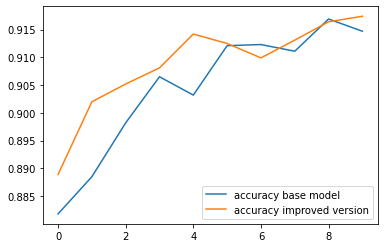

In [58]:
from matplotlib import pyplot
pyplot.plot(fash_evaluation.history['val_accuracy'], label='accuracy base model')
pyplot.plot(fash_evaluation3.history['val_accuracy'], label='accuracy improved version')
pyplot.legend()
pyplot.show()

L1 Regularization

In [ ]:
from keras import regularizers
fash_model4 = keras.models.Sequential([keras.layers.Conv2D(filters=40, kernel_regularizer = regularizers.l1(0.0001),kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=256, activation='relu'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(units=10, activation='softmax')])
fash_model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
fash_evaluation4= fash_model4.fit(fash_x_train, fash_y_train,batch_size = 65, epochs= 10, validation_data=(fash_x_test, fash_y_test))

Epoch 1/10
862/862 [==============================] - 10s 10ms/step - loss: 0.4372 - accuracy: 0.8456 - val_loss: 0.3236 - val_accuracy: 0.8826
Epoch 2/10
862/862 [==============================] - 8s 9ms/step - loss: 0.3024 - accuracy: 0.8920 - val_loss: 0.2773 - val_accuracy: 0.8992
Epoch 3/10
862/862 [==============================] - 8s 9ms/step - loss: 0.2653 - accuracy: 0.9033 - val_loss: 0.2651 - val_accuracy: 0.9050
Epoch 4/10
862/862 [==============================] - 8s 10ms/step - loss: 0.2398 - accuracy: 0.9134 - val_loss: 0.2622 - val_accuracy: 0.9064
Epoch 5/10
862/862 [==============================] - 8s 9ms/step - loss: 0.2195 - accuracy: 0.9204 - val_loss: 0.2509 - val_accuracy: 0.9110
Epoch 6/10
862/862 [==============================] - 9s 10ms/step - loss: 0.2021 - accuracy: 0.9257 - val_loss: 0.2467 - val_accuracy: 0.9112
Epoch 7/10
862/862 [==============================] - 8s 9ms/step - loss: 0.1859 - accuracy: 0.9328 - val_loss: 0.2383 - val_accuracy: 0.9164
Ep

In [ ]:
acc= 100*fash_model4.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 91.96428656578064 %


In the above we got an accuracy of 92% using L1 regularizor




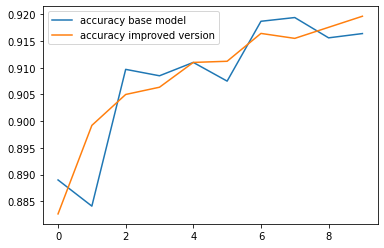

In [ ]:
pyplot.plot(fash_evaluation.history['val_accuracy'], label='accuracy base model')
pyplot.plot(fash_evaluation4.history['val_accuracy'], label='accuracy improved version')
pyplot.legend()
pyplot.show()

##Part-4

###Changing the drop out and keeping the remaining same

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
fash_model5 = keras.models.Sequential([keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Conv2D(filters=35, kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=126, activation='relu'),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(units=10, activation='softmax')])
fash_model5
fash_model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
fash_evaluation5 = fash_model5.fit(fash_x_train, fash_y_train, batch_size =50, epochs=15,validation_data=(fash_x_test, fash_y_test))

Epoch 1/15
1200/1200 [==============================] - 297s 247ms/step - loss: 0.3846 - accuracy: 0.8619 - val_loss: 0.2806 - val_accuracy: 0.8962
Epoch 2/15
1200/1200 [==============================] - 296s 246ms/step - loss: 0.2578 - accuracy: 0.9059 - val_loss: 0.2494 - val_accuracy: 0.9078
Epoch 3/15
1200/1200 [==============================] - 291s 243ms/step - loss: 0.2141 - accuracy: 0.9207 - val_loss: 0.2313 - val_accuracy: 0.9162
Epoch 4/15
1200/1200 [==============================] - 285s 237ms/step - loss: 0.1863 - accuracy: 0.9306 - val_loss: 0.2283 - val_accuracy: 0.9179
Epoch 5/15
1200/1200 [==============================] - 286s 238ms/step - loss: 0.1608 - accuracy: 0.9394 - val_loss: 0.2174 - val_accuracy: 0.9217
Epoch 6/15
1200/1200 [==============================] - 283s 236ms/step - loss: 0.1413 - accuracy: 0.9468 - val_loss: 0.2227 - val_accuracy: 0.9215
Epoch 7/15
1200/1200 [==============================] - 286s 238ms/step - loss: 0.1269 - accuracy: 0.9515 - val_

In [9]:
acc= 100*fash_model5.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 91.7900025844574 %


###Here we got an Accuracy of 91.79%

Plotting training and testing accuracy

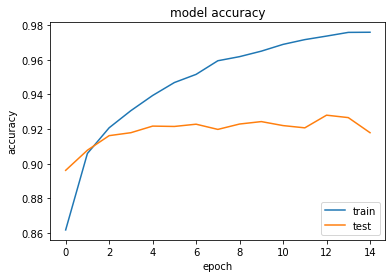

In [10]:
plt.plot(fash_evaluation5.history['accuracy'])
plt.plot(fash_evaluation5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Plotting training and test loss

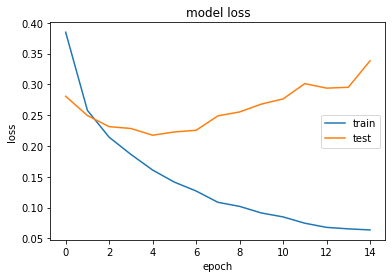

In [11]:
plt.plot(fash_evaluation5.history['loss'])
plt.plot(fash_evaluation5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
fash_model8 = keras.models.Sequential([keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Conv2D(filters=35, kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=126, activation='relu'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(units=10, activation='softmax')])
fash_model8
fash_model8.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
fash_evaluation8 = fash_model8.fit(fash_x_train, fash_y_train, batch_size =50, epochs=10,validation_data=(fash_x_test, fash_y_test))

Epoch 1/10
1200/1200 [==============================] - 293s 244ms/step - loss: 0.4363 - accuracy: 0.8432 - val_loss: 0.3055 - val_accuracy: 0.8892
Epoch 2/10
1200/1200 [==============================] - 292s 244ms/step - loss: 0.2892 - accuracy: 0.8946 - val_loss: 0.2570 - val_accuracy: 0.9047
Epoch 3/10
1200/1200 [==============================] - 287s 239ms/step - loss: 0.2482 - accuracy: 0.9083 - val_loss: 0.2333 - val_accuracy: 0.9151
Epoch 4/10
1200/1200 [==============================] - 259s 216ms/step - loss: 0.2205 - accuracy: 0.9188 - val_loss: 0.2301 - val_accuracy: 0.9141
Epoch 5/10
1200/1200 [==============================] - 231s 193ms/step - loss: 0.1976 - accuracy: 0.9274 - val_loss: 0.2168 - val_accuracy: 0.9211
Epoch 6/10
1200/1200 [==============================] - 230s 192ms/step - loss: 0.1841 - accuracy: 0.9320 - val_loss: 0.2188 - val_accuracy: 0.9186
Epoch 7/10
1200/1200 [==============================] - 232s 194ms/step - loss: 0.1670 - accuracy: 0.9368 - val_

In [14]:
acc= 100*fash_model8.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 92.80999898910522 %


PLotting Training and Testing Accuracy

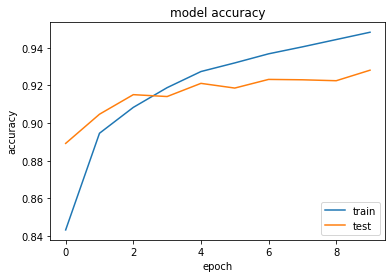

In [15]:
plt.plot(fash_evaluation8.history['accuracy'])
plt.plot(fash_evaluation8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Plotting training and testing loss

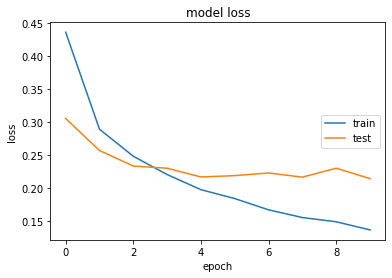

In [16]:
plt.plot(fash_evaluation8.history['loss'])
plt.plot(fash_evaluation8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
fash_model9 = keras.models.Sequential([keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Conv2D(filters=35, kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=126, activation='relu'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Dense(units=10, activation='softmax')])
fash_model9
fash_model9.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
fash_evaluation9 = fash_model9.fit(fash_x_train, fash_y_train, batch_size =50, epochs=15,validation_data=(fash_x_test, fash_y_test))

Epoch 1/15
1200/1200 [==============================] - 238s 198ms/step - loss: 0.3801 - accuracy: 0.8630 - val_loss: 0.2972 - val_accuracy: 0.8907
Epoch 2/15
1200/1200 [==============================] - 234s 195ms/step - loss: 0.2494 - accuracy: 0.9076 - val_loss: 0.2528 - val_accuracy: 0.9086
Epoch 3/15
1200/1200 [==============================] - 234s 195ms/step - loss: 0.2026 - accuracy: 0.9241 - val_loss: 0.2339 - val_accuracy: 0.9176
Epoch 4/15
1200/1200 [==============================] - 236s 197ms/step - loss: 0.1689 - accuracy: 0.9372 - val_loss: 0.2213 - val_accuracy: 0.9213
Epoch 5/15
1200/1200 [==============================] - 259s 216ms/step - loss: 0.1428 - accuracy: 0.9467 - val_loss: 0.2367 - val_accuracy: 0.9216
Epoch 6/15
1200/1200 [==============================] - 247s 206ms/step - loss: 0.1185 - accuracy: 0.9556 - val_loss: 0.2408 - val_accuracy: 0.9224
Epoch 7/15
1200/1200 [==============================] - 251s 209ms/step - loss: 0.1002 - accuracy: 0.9620 - val_

In [18]:
acc= 100*fash_model9.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 92.84999966621399 %


Plotting Training and testing Accuracy

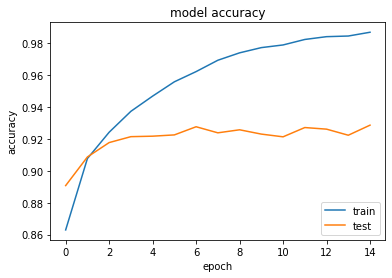

In [19]:
plt.plot(fash_evaluation9.history['accuracy'])
plt.plot(fash_evaluation9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Plotting training and testing Loss

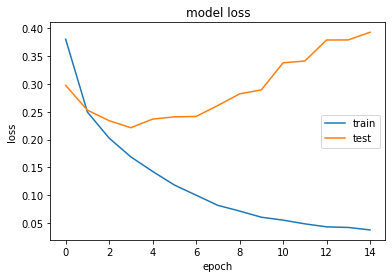

In [20]:
plt.plot(fash_evaluation9.history['loss'])
plt.plot(fash_evaluation9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

####Model 2 Changing the activation functions and keeping the remaining same 





In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
fash_model6 = keras.models.Sequential([keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='selu',input_shape=(28,28,1), padding='valid'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='valid'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='selu',input_shape=(28,28,1), padding='valid'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='valid'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=65, activation='selu'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Dense(units=10, activation='softmax')])
fash_model6
fash_model6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
fash_evaluation6 = fash_model6.fit(fash_x_train, fash_y_train, batch_size =50, epochs=10,validation_data=(fash_x_test, fash_y_test))

Epoch 1/10
1200/1200 [==============================] - 23s 11ms/step - loss: 0.4512 - accuracy: 0.8431 - val_loss: 0.3544 - val_accuracy: 0.8779
Epoch 2/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.3068 - accuracy: 0.8888 - val_loss: 0.3148 - val_accuracy: 0.8893
Epoch 3/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.2573 - accuracy: 0.9059 - val_loss: 0.2638 - val_accuracy: 0.9054
Epoch 4/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.2257 - accuracy: 0.9172 - val_loss: 0.2781 - val_accuracy: 0.9035
Epoch 5/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.1977 - accuracy: 0.9276 - val_loss: 0.2921 - val_accuracy: 0.8960
Epoch 6/10
1200/1200 [==============================] - 14s 12ms/step - loss: 0.1743 - accuracy: 0.9355 - val_loss: 0.2911 - val_accuracy: 0.9028
Epoch 7/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.1600 - accuracy: 0.9402 - val_loss: 0.3173 -

In [10]:
acc= 100*fash_model6.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 90.85000157356262 %


Plotting Training and Testing Accuracy

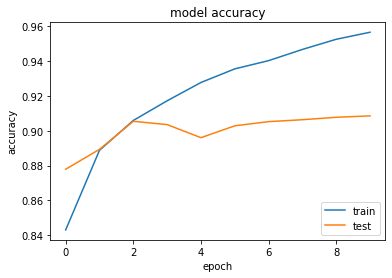

In [11]:
plt.plot(fash_evaluation6.history['accuracy'])
plt.plot(fash_evaluation6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Plotting Training and Testing Loss

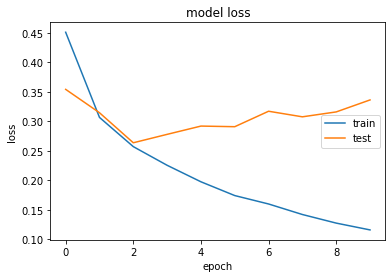

In [12]:
plt.plot(fash_evaluation6.history['loss'])
plt.plot(fash_evaluation6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

###Relu

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
fash_model10= keras.models.Sequential([keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='valid'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='valid'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='valid'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='valid'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=65, activation='relu'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Dense(units=10, activation='softmax')])
fash_model10
fash_model10.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
fash_evaluation10 = fash_model10.fit(fash_x_train, fash_y_train, batch_size =50, epochs=10,validation_data=(fash_x_test, fash_y_test))

Epoch 1/10
1200/1200 [==============================] - 14s 11ms/step - loss: 0.4414 - accuracy: 0.8419 - val_loss: 0.3218 - val_accuracy: 0.8809
Epoch 2/10
1200/1200 [==============================] - 12s 10ms/step - loss: 0.2900 - accuracy: 0.8946 - val_loss: 0.2580 - val_accuracy: 0.9084
Epoch 3/10
1200/1200 [==============================] - 13s 10ms/step - loss: 0.2443 - accuracy: 0.9106 - val_loss: 0.2508 - val_accuracy: 0.9093
Epoch 4/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.2137 - accuracy: 0.9202 - val_loss: 0.2446 - val_accuracy: 0.9128
Epoch 5/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.1865 - accuracy: 0.9304 - val_loss: 0.2341 - val_accuracy: 0.9166
Epoch 6/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.1679 - accuracy: 0.9377 - val_loss: 0.2516 - val_accuracy: 0.9144
Epoch 7/10
1200/1200 [==============================] - 13s 10ms/step - loss: 0.1493 - accuracy: 0.9448 - val_loss: 0.2405 -

In [14]:
acc= 100*fash_model10.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 91.80999994277954 %


###Plotting train and Test Accuracy

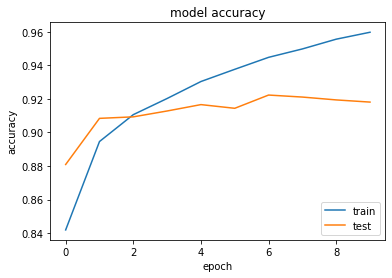

In [15]:
plt.plot(fash_evaluation10.history['accuracy'])
plt.plot(fash_evaluation10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Plotting train and test loss

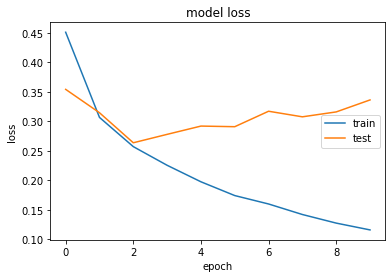

In [16]:
plt.plot(fash_evaluation6.history['loss'])
plt.plot(fash_evaluation6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

###Tanh

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
fash_model11= keras.models.Sequential([keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='elu',input_shape=(28,28,1), padding='valid'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='valid'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='elu',input_shape=(28,28,1), padding='valid'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='valid'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=65, activation='elu'),
                                 keras.layers.Dropout(0.1),
                                 keras.layers.Dense(units=10, activation='softmax')])
fash_model11
fash_model11.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
fash_evaluation11 = fash_model11.fit(fash_x_train, fash_y_train, batch_size =50, epochs=10,validation_data=(fash_x_test, fash_y_test))

Epoch 1/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.4075 - accuracy: 0.8542 - val_loss: 0.3118 - val_accuracy: 0.8884
Epoch 2/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.2877 - accuracy: 0.8944 - val_loss: 0.2867 - val_accuracy: 0.8970
Epoch 3/10
1200/1200 [==============================] - 14s 12ms/step - loss: 0.2452 - accuracy: 0.9083 - val_loss: 0.2751 - val_accuracy: 0.9029
Epoch 4/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.2130 - accuracy: 0.9208 - val_loss: 0.2637 - val_accuracy: 0.9095
Epoch 5/10
1200/1200 [==============================] - 13s 10ms/step - loss: 0.1885 - accuracy: 0.9306 - val_loss: 0.2856 - val_accuracy: 0.9076
Epoch 6/10
1200/1200 [==============================] - 13s 10ms/step - loss: 0.1671 - accuracy: 0.9375 - val_loss: 0.2691 - val_accuracy: 0.9092
Epoch 7/10
1200/1200 [==============================] - 13s 11ms/step - loss: 0.1480 - accuracy: 0.9451 - val_loss: 0.3026 -

In [18]:
acc= 100*fash_model11.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 89.55000042915344 %


###Plotting train and test Accuracy

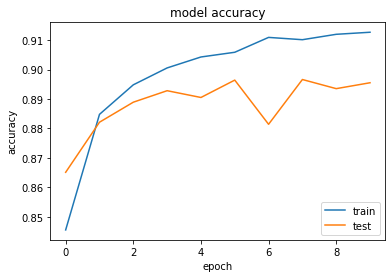

In [19]:
plt.plot(fash_evaluation11.history['accuracy'])
plt.plot(fash_evaluation11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Plotting train and test loss

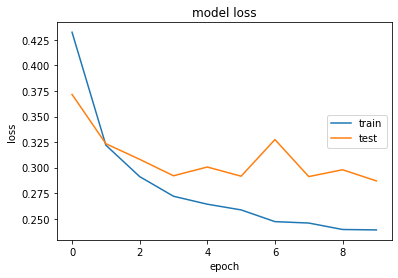

In [20]:
plt.plot(fash_evaluation11.history['loss'])
plt.plot(fash_evaluation11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

###Model3

RMSProp

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
fash_model6 = keras.models.Sequential([keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Conv2D(filters=30,kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=65, activation='relu'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(units=10, activation='softmax')])
fash_model6
fash_model6.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
fash_evaluation6 = fash_model6.fit(fash_x_train, fash_y_train, batch_size =50, epochs=15,validation_data=(fash_x_test, fash_y_test))

Epoch 1/15
1200/1200 [==============================] - 17s 14ms/step - loss: 0.5025 - accuracy: 0.8279 - val_loss: 0.3233 - val_accuracy: 0.8882
Epoch 2/15
1200/1200 [==============================] - 15s 12ms/step - loss: 0.3359 - accuracy: 0.8848 - val_loss: 0.3209 - val_accuracy: 0.8984
Epoch 3/15
1200/1200 [==============================] - 17s 14ms/step - loss: 0.3136 - accuracy: 0.8929 - val_loss: 0.3508 - val_accuracy: 0.8926
Epoch 4/15
1200/1200 [==============================] - 15s 12ms/step - loss: 0.3133 - accuracy: 0.8949 - val_loss: 0.3549 - val_accuracy: 0.8965
Epoch 5/15
1200/1200 [==============================] - 14s 12ms/step - loss: 0.3109 - accuracy: 0.8961 - val_loss: 0.3423 - val_accuracy: 0.8907
Epoch 6/15
1200/1200 [==============================] - 15s 12ms/step - loss: 0.3118 - accuracy: 0.8965 - val_loss: 0.3051 - val_accuracy: 0.9027
Epoch 7/15
1200/1200 [==============================] - 14s 12ms/step - loss: 0.3170 - accuracy: 0.8950 - val_loss: 0.3804 -

In [33]:
acc= 100*fash_model6.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 84.27000045776367 %


###Plotting train and test Accuracy

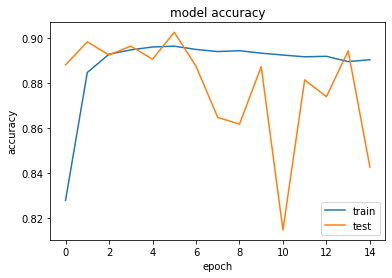

In [34]:
plt.plot(fash_evaluation6.history['accuracy'])
plt.plot(fash_evaluation6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Plot train and test loss

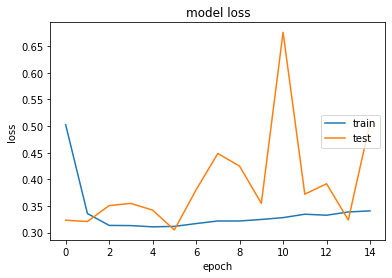

In [36]:
plt.plot(fash_evaluation6.history['loss'])
plt.plot(fash_evaluation6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

###Adam

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
fash_model12 = keras.models.Sequential([keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Conv2D(filters=30,kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=65, activation='relu'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(units=10, activation='softmax')])
fash_model12
fash_model12.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
fash_evaluation12 = fash_model12.fit(fash_x_train, fash_y_train, batch_size =50, epochs=15,validation_data=(fash_x_test, fash_y_test))

Epoch 1/15
1200/1200 [==============================] - 15s 12ms/step - loss: 0.5011 - accuracy: 0.8241 - val_loss: 0.3134 - val_accuracy: 0.8868
Epoch 2/15
1200/1200 [==============================] - 14s 11ms/step - loss: 0.3305 - accuracy: 0.8820 - val_loss: 0.2819 - val_accuracy: 0.8942
Epoch 3/15
1200/1200 [==============================] - 13s 11ms/step - loss: 0.2885 - accuracy: 0.8954 - val_loss: 0.2593 - val_accuracy: 0.9071
Epoch 4/15
1200/1200 [==============================] - 13s 11ms/step - loss: 0.2623 - accuracy: 0.9039 - val_loss: 0.2454 - val_accuracy: 0.9109
Epoch 5/15
1200/1200 [==============================] - 14s 11ms/step - loss: 0.2449 - accuracy: 0.9107 - val_loss: 0.2347 - val_accuracy: 0.9142
Epoch 6/15
1200/1200 [==============================] - 13s 11ms/step - loss: 0.2315 - accuracy: 0.9144 - val_loss: 0.2493 - val_accuracy: 0.9060
Epoch 7/15
1200/1200 [==============================] - 13s 11ms/step - loss: 0.2204 - accuracy: 0.9179 - val_loss: 0.2319 -

In [38]:
acc= 100*fash_model12.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 92.04999804496765 %


###Plot train and test Accuracy

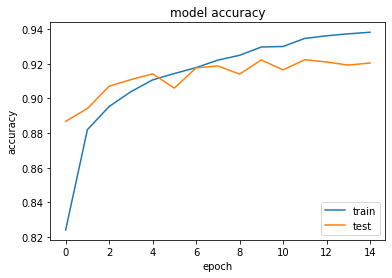

In [39]:
plt.plot(fash_evaluation12.history['accuracy'])
plt.plot(fash_evaluation12.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Plot train and test loss

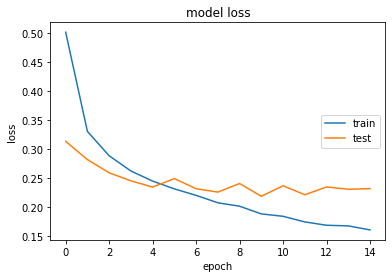

In [41]:
plt.plot(fash_evaluation12.history['loss'])
plt.plot(fash_evaluation12.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

###SGD

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
fash_model13 = keras.models.Sequential([keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Conv2D(filters=30,kernel_size=(3,3),strides=1, activation='relu',input_shape=(28,28,1), padding='same'),
                                 keras.layers.MaxPool2D(pool_size=2, strides=1, padding='same'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=65, activation='relu'),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(units=10, activation='softmax')])
fash_model13
opt = SGD(lr=0.01, momentum=0.7)
fash_model13.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
fash_evaluation13 = fash_model13.fit(fash_x_train, fash_y_train, batch_size =50, epochs=15,validation_data=(fash_x_test, fash_y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
1200/1200 [==============================] - 14s 11ms/step - loss: 0.6501 - accuracy: 0.7582 - val_loss: 0.4470 - val_accuracy: 0.8338
Epoch 2/15
1200/1200 [==============================] - 13s 11ms/step - loss: 0.4469 - accuracy: 0.8407 - val_loss: 0.3638 - val_accuracy: 0.8672
Epoch 3/15
1200/1200 [==============================] - 13s 11ms/step - loss: 0.3926 - accuracy: 0.8597 - val_loss: 0.3318 - val_accuracy: 0.8754
Epoch 4/15
1200/1200 [==============================] - 13s 11ms/step - loss: 0.3570 - accuracy: 0.8718 - val_loss: 0.3159 - val_accuracy: 0.8835
Epoch 5/15
1200/1200 [==============================] - 13s 11ms/step - loss: 0.3366 - accuracy: 0.8782 - val_loss: 0.3055 - val_accuracy: 0.8876
Epoch 6/15
1200/1200 [==============================] - 13s 11ms/step - loss: 0.3170 - accuracy: 0.8847 - val_loss: 0.2877 - val_accuracy: 0.8952
Epoch 7/15
1200/1200 [==============================] - 13s 11ms/step - loss: 0.3026 - accuracy: 0.8888 - val_loss: 0.2760 -

In [47]:
acc= 100*fash_model13.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 91.62999987602234 %


###Plotting train and test Accuracy

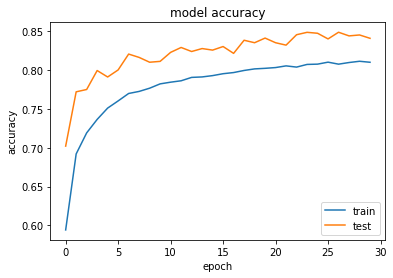

In [115]:
plt.plot(fash_evaluation13.history['accuracy'])
plt.plot(fash_evaluation13.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Plotting train and test loss

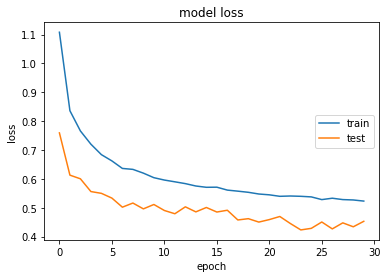

In [116]:
plt.plot(fash_evaluation13.history['loss'])
plt.plot(fash_evaluation13.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

#4(3) Data Augmentation

In [118]:
data_augmentation = tf.keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
  # tf.keras.layers.RandomZoom(0.3)
])

In [119]:
from keras.layers import Dropout
model14 = tf.keras.Sequential([
  data_augmentation,
  keras.layers.Conv2D(30, 5, padding='same',kernel_initializer='random_normal', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=2, strides=1, padding='same'),
  keras.layers.Dropout(0.2),
  keras.layers.Conv2D(30, 5, padding='same',kernel_initializer='random_normal', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=2, strides=1, padding='same'),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(units=65, activation='relu'),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(units=10, activation='softmax')])
model14
model14.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
fash_evaluation14 = model14.fit(fash_x_train, fash_y_train, batch_size =60, epochs=100,validation_data=(fash_x_test, fash_y_test))

Epoch 1/100
1000/1000 [==============================] - 14s 12ms/step - loss: 1.2006 - accuracy: 0.5498 - val_loss: 0.7583 - val_accuracy: 0.7332
Epoch 2/100
1000/1000 [==============================] - 12s 12ms/step - loss: 0.8888 - accuracy: 0.6706 - val_loss: 0.6535 - val_accuracy: 0.7613
Epoch 3/100
1000/1000 [==============================] - 12s 12ms/step - loss: 0.7956 - accuracy: 0.7084 - val_loss: 0.6284 - val_accuracy: 0.7672
Epoch 4/100
1000/1000 [==============================] - 13s 13ms/step - loss: 0.7452 - accuracy: 0.7291 - val_loss: 0.5868 - val_accuracy: 0.7918
Epoch 5/100
1000/1000 [==============================] - 12s 12ms/step - loss: 0.7110 - accuracy: 0.7426 - val_loss: 0.5581 - val_accuracy: 0.8058
Epoch 6/100
1000/1000 [==============================] - 12s 12ms/step - loss: 0.6823 - accuracy: 0.7537 - val_loss: 0.5370 - val_accuracy: 0.8092
Epoch 7/100
1000/1000 [==============================] - 13s 13ms/step - loss: 0.6618 - accuracy: 0.7620 - val_loss: 0

In [121]:
acc= 100*model14.evaluate(fash_x_test, fash_y_test, verbose=0)[1]
print('Test accuracy:', acc,'%')

Test accuracy: 86.94999814033508 %


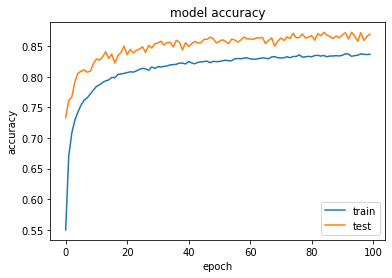

In [122]:
plt.plot(fash_evaluation14.history['accuracy'])
plt.plot(fash_evaluation14.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

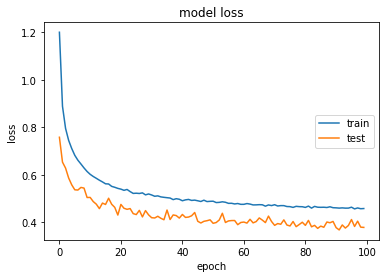

In [123]:
plt.plot(fash_evaluation14.history['loss'])
plt.plot(fash_evaluation14.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

#References
1.https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

2.https://www.tensorflow.org/guide/keras/preprocessing_layers#:~:text=The%20Keras%20preprocessing%20layers%20API,part%20of%20a%20Keras%20SavedModel

3.https://www.kaggle.com/code/venkatkrishnan/data-augmentation-deep-learning/notebook

4.https://docs.activeloop.ai/datasets/fashion-mnist-dataset

5.https://www.kaggle.com/code/arnavr10880/fashion-mnist-lenet-cnn-old-is-gold

6.https://blog.tensorflow.org/2018/04/fashion-mnist-with-tfkeras.html

7.https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/